## WeatherPy
### - Cities that are in the range of +- 20 degrees of the equator (0 degree latitude) are the hottest.
### - Cities that are above 60 degree latitude are more likely to be humid.
### - Hard to deduce any info regarding wind speed or cloudiness compared to latitude with this data.

In [9]:
# dependencies
import requests as req
import datetime
import time
import json
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import random

In [10]:
# base url & personal api key
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
df = pd.DataFrame(columns = ['City','Country','Date','Latitude','Longitude',
                            'Max_Temp','Humidity','Cloudiness','Wind_Speed'])
df

,City,Country,Date,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed


## Generate Cities List

In [11]:
# 3000 sets of lat & long
lat_list = map(lambda x: x / 100, random.sample(range(-9000,9000), 3000))
lng_list = map(lambda x: x / 100, random.sample(range(-18000,18000), 3000))
latlng = list(zip(lat_list,lng_list))

# UNIQUE list of cities from above 3000 sets of lat & long
cities = list(set(list(
    map(lambda x: x.city_name, 
        [citipy.nearest_city(latlng[i][0],latlng[i][1]) for i in range(len(latlng))]))))

## Perform API Calls

In [12]:
# api calls of 500 unique cities and adding necessary data to df
for i in range(500):
    query_url = "{}?appid={}&q={}".format(url,api_key,cities[i])
    if i%50 == 0:
        time.sleep(50)
        
    try:
        weather_json = req.get(query_url).json()
        print("*"*50)
        print("API Call {} | City Number: {}, City Name: {}".format(i+1,
                                    weather_json['id'],weather_json['name']))
        print(query_url)
    except:
        print("API call fail T.T")
        break
    
    try:
        df.set_value(i,'City',weather_json['name'])
        df.set_value(i,'Country',weather_json['sys']['country'])
        df.set_value(i,'Date',datetime.datetime.fromtimestamp(weather_json['dt']))
        df.set_value(i,'Latitude',weather_json['coord']['lat'])
        df.set_value(i,'Longitude',weather_json['coord']['lon'])
        df.set_value(i,'Max_Temp',weather_json['main']['temp_max'])
        df.set_value(i,'Humidity',weather_json['main']['humidity'])
        df.set_value(i,'Cloudiness',weather_json['clouds']['all'])
        df.set_value(i,'Wind_Speed',weather_json['wind']['speed'])
    except:
        print('error T.T')
        continue
        
# Save the DataFrame as a csv
df.to_csv("0_WeatherOf500Cities.csv", encoding="utf-8", index=False)
df.head()

**************************************************
API Call 1 | City Number: 2356228, City Name: Reo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=reo
**************************************************
API Call 2 | City Number: 2169535, City Name: Dalby
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dalby
**************************************************
API Call 3 | City Number: 935215, City Name: Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-philippe
**************************************************
API Call 4 | City Number: 2017155, City Name: Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh
**************************************************
API Call 5 | City Number: 3545981, City Name: Niquero
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&

**************************************************
API Call 42 | City Number: 2171845, City Name: Cessnock
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cessnock
**************************************************
API Call 43 | City Number: 964420, City Name: Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port elizabeth
**************************************************
API Call 44 | City Number: 2173323, City Name: Bundaberg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bundaberg
**************************************************
API Call 45 | City Number: 5848280, City Name: Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kapaa
**************************************************
API Call 46 | City Number: 2122574, City Name: Ola
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0

**************************************************
API Call 83 | City Number: 545467, City Name: Konevo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=konevo
**************************************************
API Call 84 | City Number: 1106643, City Name: Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=quatre cocos
**************************************************
API Call 85 | City Number: 3981391, City Name: Tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tomatlan
**************************************************
API Call 86 | City Number: 147982, City Name: Imishli
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=imisli
**************************************************
API Call 87 | City Number: 2063056, City Name: Port Augusta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece

**************************************************
API Call 123 | City Number: 3838874, City Name: Rio Cuarto
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rio cuarto
**************************************************
API Call 124 | City Number: 128008, City Name: Herowabad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khalkhal
**************************************************
API Call 125 | City Number: 6111696, City Name: Port-Cartier
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port-cartier
**************************************************
API Call 126 | City Number: 1265310, City Name: Laharpur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=laharpur
**************************************************
API Call 127 | City Number: 5314245, City Name: Show Low
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a

**************************************************
API Call 163 | City Number: 364933, City Name: Umm Kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=umm kaddadah
**************************************************
API Call 164 | City Number: 2742416, City Name: Barcelos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barcelos
**************************************************
API Call 165 | City Number: 686090, City Name: Asau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=asau
**************************************************
API Call 166 | City Number: 1496633, City Name: Novovarshavka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=novovarshavka
**************************************************
API Call 167 | City Number: 1489508, City Name: Toguchin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196

**************************************************
API Call 203 | City Number: 128226, City Name: Kermanshah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kermanshah
**************************************************
API Call 204 | City Number: 3462284, City Name: Gramado
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gramado
**************************************************
API Call 205 | City Number: 2451274, City Name: Sialo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yerani
**************************************************
API Call 206 | City Number: 1800498, City Name: Mingshui
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mingshui
**************************************************
API Call 207 | City Number: 4885265, City Name: Bolingbrook
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eec

**************************************************
API Call 243 | City Number: 2175819, City Name: Biloela
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=biloela
**************************************************
API Call 244 | City Number: 2729907, City Name: Longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=longyearbyen
**************************************************
API Call 245 | City Number: 4255151, City Name: Bud
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bud
**************************************************
API Call 246 | City Number: 4471851, City Name: Hope Mills
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hope mills
**************************************************
API Call 247 | City Number: 6690297, City Name: Saint-Leu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

**************************************************
API Call 283 | City Number: 2188942, City Name: Kawerau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kawerau
**************************************************
API Call 284 | City Number: 2013279, City Name: Vostok
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vostok
**************************************************
API Call 285 | City Number: 2132606, City Name: Samarai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=samarai
**************************************************
API Call 286 | City Number: 4031637, City Name: Lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lavrentiya
**************************************************
API Call 287 | City Number: 1486321, City Name: Yar-Sale
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0b

**************************************************
API Call 324 | City Number: 2015306, City Name: Tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiksi
**************************************************
API Call 325 | City Number: 3424607, City Name: Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tasiilaq
**************************************************
API Call 326 | City Number: 3387928, City Name: Senador Jose Porfirio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=senador jose porfirio
**************************************************
API Call 327 | City Number: 3372760, City Name: Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=praia da vitoria
**************************************************
API Call 328 | City Number: 1062663, City Name: Mahajanga
http://api.openweathermap.org/data/

**************************************************
API Call 364 | City Number: 2095925, City Name: Ialibu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ialibu
**************************************************
API Call 365 | City Number: 609798, City Name: Inderbor
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=inderborskiy
**************************************************
API Call 366 | City Number: 5557293, City Name: Sitka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sitka
**************************************************
API Call 367 | City Number: 2647311, City Name: Haverfordwest
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=haverfordwest
**************************************************
API Call 368 | City Number: 3628473, City Name: San Cristobal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196

**************************************************
API Call 405 | City Number: 2274275, City Name: Robertsport
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=robertsport
**************************************************
API Call 406 | City Number: 3584003, City Name: Puerto El Triunfo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=puerto el triunfo
**************************************************
API Call 407 | City Number: 2334008, City Name: Kontagora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kontagora
**************************************************
API Call 408 | City Number: 2109701, City Name: Auki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=auki
**************************************************
API Call 409 | City Number: 1529651, City Name: Altay
http://api.openweathermap.org/data/2.5/weather?appid=25bc

**************************************************
API Call 445 | City Number: 2093685, City Name: Kokopo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kokopo
**************************************************
API Call 446 | City Number: 1065158, City Name: Farafangana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=farafangana
**************************************************
API Call 447 | City Number: 2018735, City Name: Nyurba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nyurba
**************************************************
API Call 448 | City Number: 1494111, City Name: Prokudskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=prokudskoye
**************************************************
API Call 449 | City Number: 5058868, City Name: Devils Lake
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e

**************************************************
API Call 485 | City Number: 3855075, City Name: General Pico
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=general pico
**************************************************
API Call 486 | City Number: 2174933, City Name: Bongaree
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bongaree
**************************************************
API Call 487 | City Number: 3414079, City Name: Ólafsvík
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=olafsvik
**************************************************
API Call 488 | City Number: 1513491, City Name: Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=komsomolskiy
**************************************************
API Call 489 | City Number: 3347719, City Name: Luena
http://api.openweathermap.org/data/2.5/weather?appid=25bc90

,City,Country,Date,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Reo,BF,2017-09-12 10:28:39,12.32,-2.47,304.962,71,32,2.04
1,Dalby,AU,2017-09-12 09:00:00,-27.18,151.27,288.15,47,0,4.6
2,Saint-Philippe,RE,2017-09-12 10:00:00,-21.36,55.77,296.15,56,90,6.2
3,Saskylakh,RU,2017-09-12 10:28:40,71.92,114.08,270.962,82,0,1.22
4,Niquero,CU,2017-09-12 10:28:40,20.04,-77.58,303.762,90,20,2.72


## Latitude vs Temperature Plot

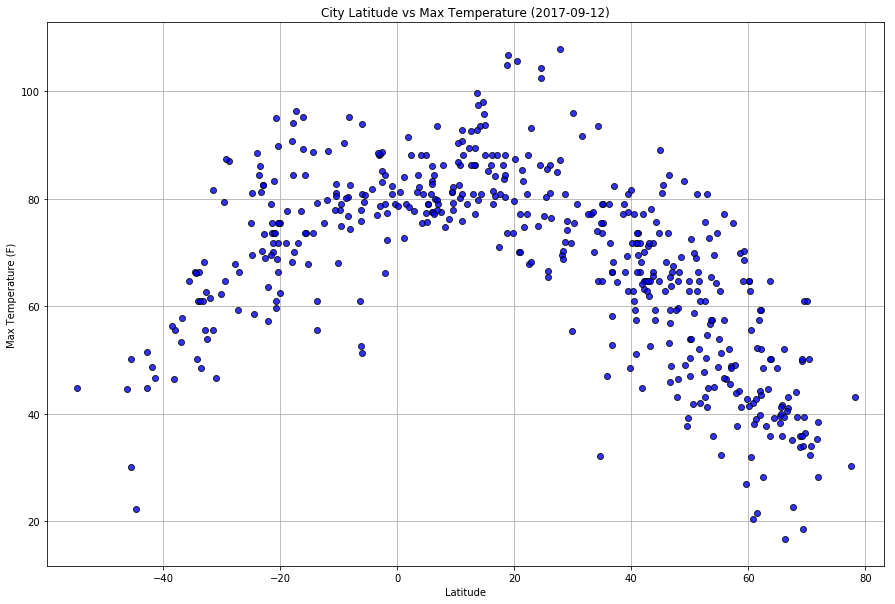

In [13]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],(9/5 * (df["Max_Temp"].iloc[i]-273) + 32),marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Max Temperature ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude'])- 5, max(df['Latitude'])+ 5])
plt.ylim([min(9/5 * (df['Max_Temp']-273) + 32) - 5, max(9/5 * (df['Max_Temp']-273) + 32) + 5])

plt.savefig("1_LatvsTemp.png")
plt.show()

## Latitude vs Humidity Plot

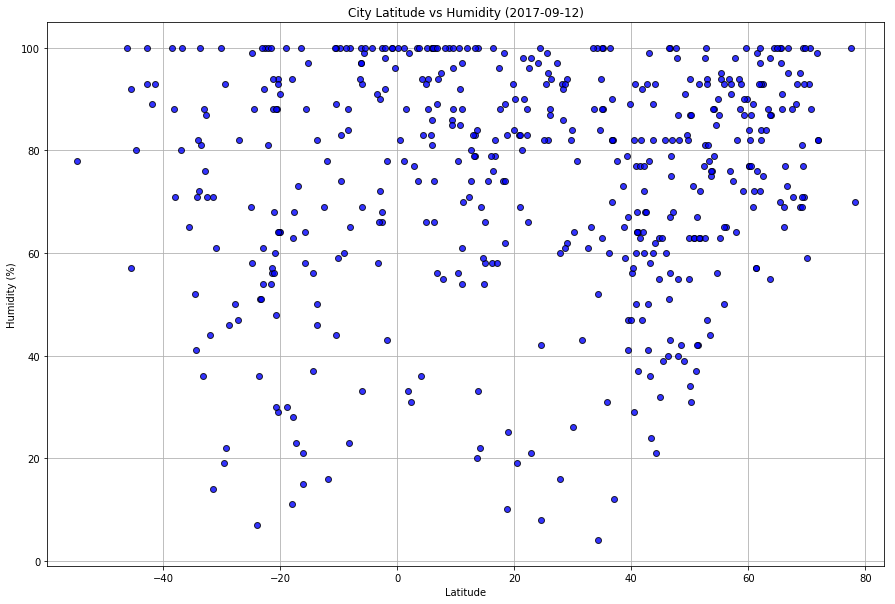

In [14]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Humidity'].iloc[i],marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Humidity ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Humidity']) - 5, max(df['Humidity']) + 5])

plt.savefig("2_LatvsHum.png")
plt.show()

## Latitude vs Cloudiness Plot

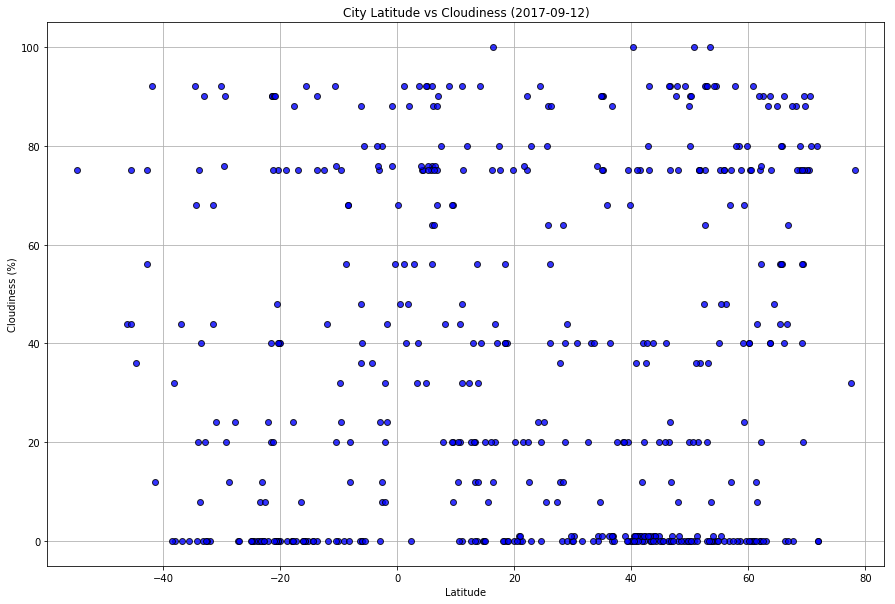

In [15]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Cloudiness'].iloc[i],marker="o",markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Cloudiness ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Cloudiness']) - 5, max(df['Cloudiness']) + 5])

plt.savefig("3_LatvsCloud.png")
plt.show()

## Latitude vs Wind Speed Plot

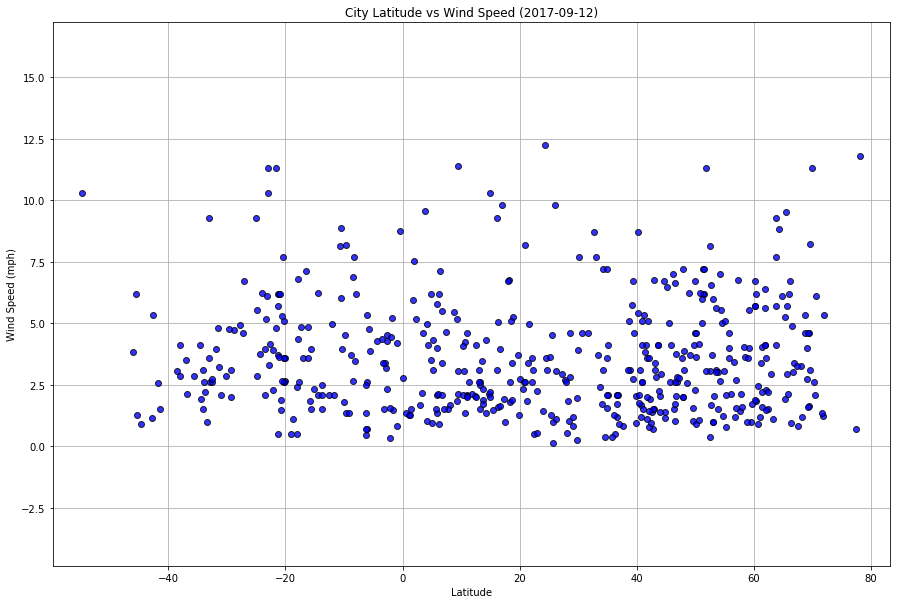

In [16]:
plt.figure(figsize=(15,10))
for i in range(len(df['Latitude'])):
    plt.plot(df["Latitude"].iloc[i],df['Wind_Speed'].iloc[i],marker="o", markeredgecolor='black',
             color='blue',alpha=0.8)
    
plt.title("City Latitude vs Wind Speed ({})".format(str(df['Date'].iloc[0]).split(' ')[0]))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([min(df['Latitude']) - 5, max(df['Latitude']) + 5])
plt.ylim([min(df['Wind_Speed']) - 5, max(df['Wind_Speed']) + 5])

plt.savefig("4_LatvsWind.png")
plt.show()